In [48]:
#the libraries

import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.mixture import GaussianMixture #gmmclassification
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from afinn import Afinn #for sentiment analysis
import pickle

In [31]:
#downloading the data
data = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/Womens%20Clothing%20E-Commerce%20Reviews.csv',index_col = [0]) #removes unnamed:0
data.head()

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [32]:
data.dropna(inplace = True)  #removed all the na data points
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19662 entries, 2 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              19662 non-null  int64 
 1   Age                      19662 non-null  int64 
 2   Title                    19662 non-null  object
 3   Review Text              19662 non-null  object
 4   Rating                   19662 non-null  int64 
 5   Recommended IND          19662 non-null  int64 
 6   Positive Feedback Count  19662 non-null  int64 
 7   Division Name            19662 non-null  object
 8   Department Name          19662 non-null  object
 9   Class Name               19662 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.7+ MB


In [37]:
#keeping only the relevant columns of data for analysis
review_data = data.drop(['Clothing ID','Class Name','Department Name','Title','Division Name','Recommended IND'], axis = 1)
review_data.head()

,Age,Review Text,Rating,Positive Feedback Count
2,60,I had such high hopes for this dress and reall...,3,0
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,0
4,47,This shirt is very flattering to all due to th...,5,6
5,49,"I love tracy reese dresses, but this one is no...",2,4
6,39,I aded this in my basket at hte last mintue to...,5,1


In [47]:
#!pip install afinn
#sentiment analysis

af = Afinn()
review_data['Review Text'] = review_data['Review Text'].str.lower()
review_data['sent_score'] = review_data.apply(lambda row: af.score(row['Review Text']), axis = 1)
review_data.to_csv('review_with_score.csv')
sent_score = review_data['sent_score'].values
with open('sent.txt','wb') as fp:
    pickle.dump(sent_score, fp)
    
with open('sent.txt', 'rb') as fp:
    b = pickle.load(fp)

print(b)

[ 5. 22.  6. ...  9. 14.  9.]


In [50]:
#the output
review_data.head()

,Age,Review Text,Rating,Positive Feedback Count,sent_score
2,60,i had such high hopes for this dress and reall...,3,0,5.0
3,50,"i love, love, love this jumpsuit. it's fun, fl...",5,0,22.0
4,47,this shirt is very flattering to all due to th...,5,6,6.0
5,49,"i love tracy reese dresses, but this one is no...",2,4,7.0
6,39,i aded this in my basket at hte last mintue to...,5,1,-3.0


In [60]:
#dripping the review_text and removing negative sentiment scores
scores_data = review_data.drop('Review Text', axis = 1)
min_scores = abs(np.min(scores_data['sent_score']))
scores_data['sent_score'] = scores_data['sent_score']+ min_scores
scores_data.head()

,Age,Rating,Positive Feedback Count,sent_score
2,60,3,0,18.0
3,50,5,0,35.0
4,47,5,6,19.0
5,49,2,4,20.0
6,39,5,1,10.0


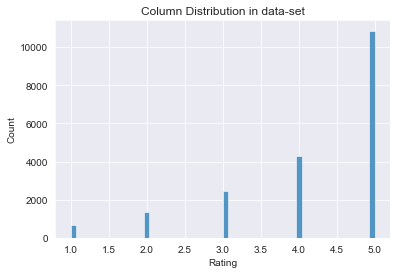

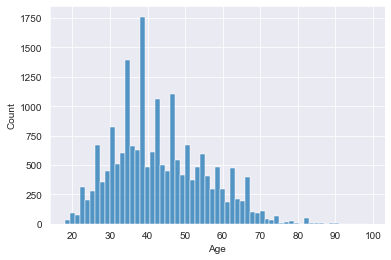

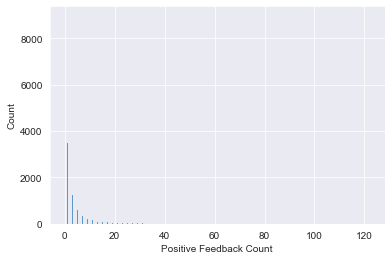

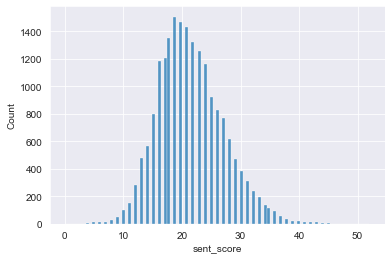

In [61]:
#visualisation of the data

sns.set_style('darkgrid')
plt.title('Column Distribution in data-set')

for i,col in enumerate(scores_data.columns):
    plt.figure(i)
    sns.histplot(scores_data[col]);

- Majority of the values are not normally distributed
- K Means Algo does not handle skwed data properly
- Transform each variable to a normal distribution, using log transformation
- To ensure all numbers are positive adding 1 to all values

E:\Data_Science\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Data_Science\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\Data_Science\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms)

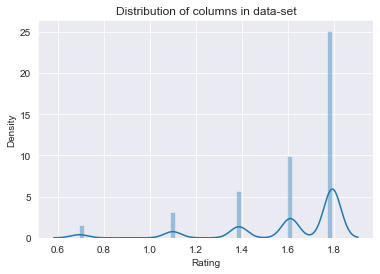

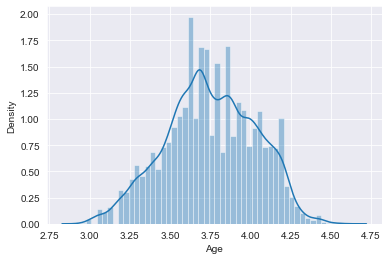

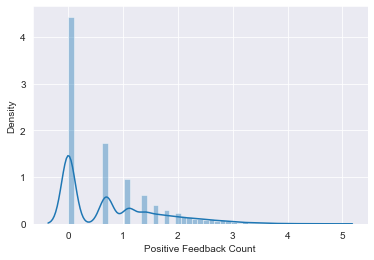

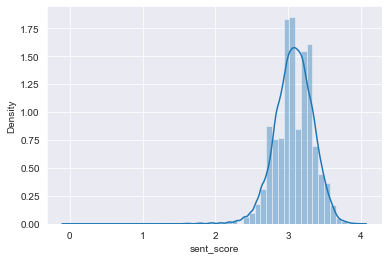

In [69]:
#box-cox transformation for skewed data
from scipy.stats import boxcox
tmp = scores_data
tmp = tmp + 1

for i in tmp.columns:
    tmp[i] = np.log(tmp[i])

scores_updated = tmp

sns.set_style('darkgrid')
plt.title('Distribution of columns in data-set')

for i, col in enumerate(scores_updated.columns):
    plt.figure(i)
    sns.distplot(scores_updated[col])

- After log transformation, age and sent_score seem to be normally distributed
- Dropping other variables now, and use Z scaling which will essentially tell us how far each data point is from the mean in terms of standard deviation

In [74]:
scores_mod = scores_updated[['Age', 'sent_score']]

from scipy import stats

scores_std = stats.zscore(scores_mod)
scores_std = np.array(scores_std)

In [86]:
scores_std

array([[ 1.28788845, -0.52581089],
       [ 0.64583153,  1.95743013],
       [ 0.42843503, -0.3265031 ],
       ...,
       [-1.02554011,  0.21656288],
       [-1.37854069,  0.98091023],
       [ 0.78376946,  0.21656288]])

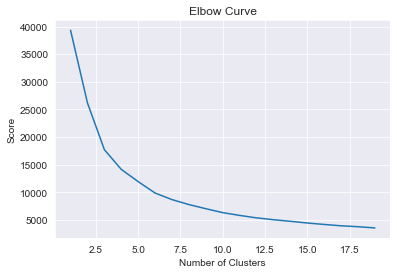

In [88]:
#Using Elbow method to get optimal number of clusters - for which we will iterate through different k-values, 
# and plot the total within cluster distances for each K value

import pylab as pl
number_of_clusters = range(1,20)
kmeans = [KMeans(n_clusters=i,max_iter=1000,random_state=42) for i in number_of_clusters]
score = [-1*kmeans[i].fit(scores_std).score(scores_std) for i in range(len(kmeans))]
pl.plot((number_of_clusters),score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show();

#we will be using the elbow point as 6

In [89]:
kmeans_test = KMeans(n_clusters = 6, max_iter = 10000, random_state = 42)
-1*kmeans_test.fit(scores_std).score(scores_std)

9863.234663547277

In [90]:
scores_data['labels'] = kmeans_test.labels_
scores_data.head()

,Age,Rating,Positive Feedback Count,sent_score,labels
2,60,3,0,18.0,2
3,50,5,0,35.0,3
4,47,5,6,19.0,0
5,49,2,4,20.0,2
6,39,5,1,10.0,1


In [93]:
cluster_size = scores_data.groupby('labels').size().reset_index()
cluster_size.columns = ['labels', 'number_of_points']
cluster_size['percentage'] = cluster_size['number_of_points']/np.sum(cluster_size['number_of_points'])

cluster_size

,labels,number_of_points,percentage
0,0,4925,0.250483
1,1,2311,0.117536
2,2,3482,0.177093
3,3,3366,0.171193
4,4,2660,0.135286
5,5,2918,0.148408


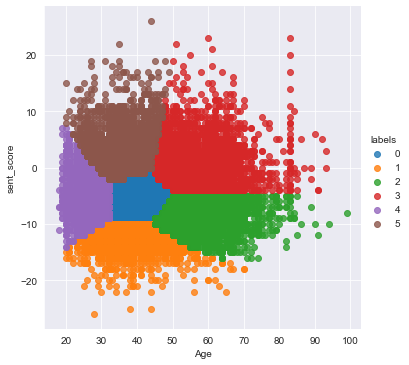

In [95]:
#visualising each of the clusters
scores_data['sent_score'] = scores_data['sent_score'] - min_scores
sns.lmplot(x = 'Age', y = 'sent_score', data = scores_data, hue = 'labels', fit_reg = False)
plt.show();

E:\Data_Science\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


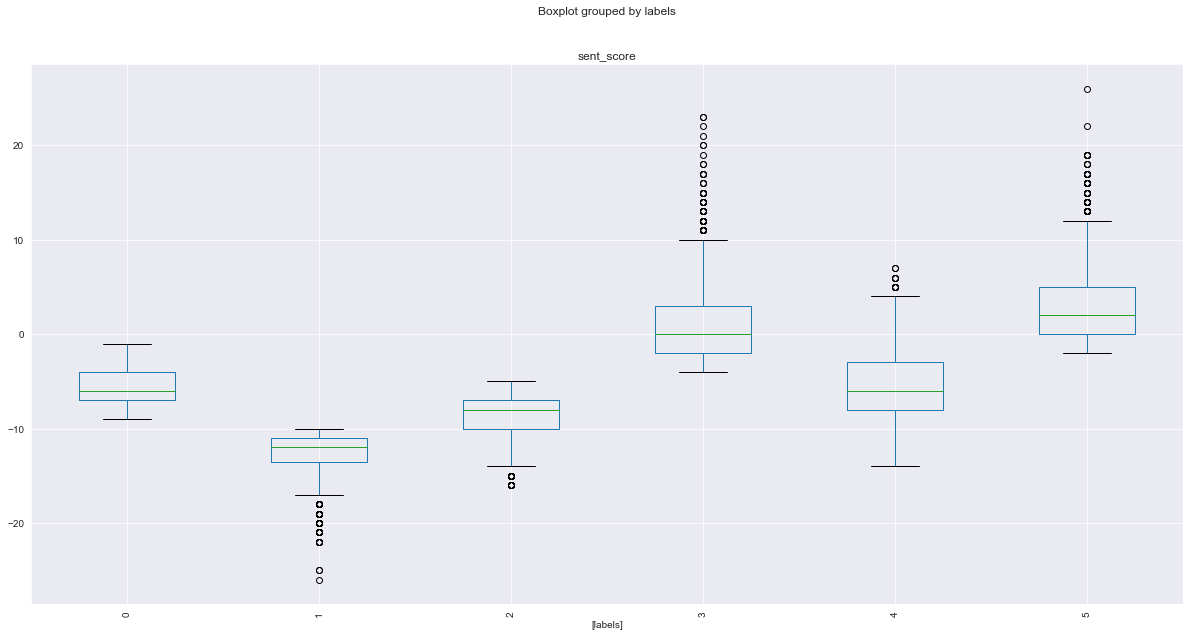

In [97]:
# visualising the clusters as a box-plot

sent_labels = scores_data[['sent_score', 'labels']]
sent_labels.boxplot(by = 'labels', figsize = (20,10))
plt.xticks(rotation= 90)
plt.show();

E:\Data_Science\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


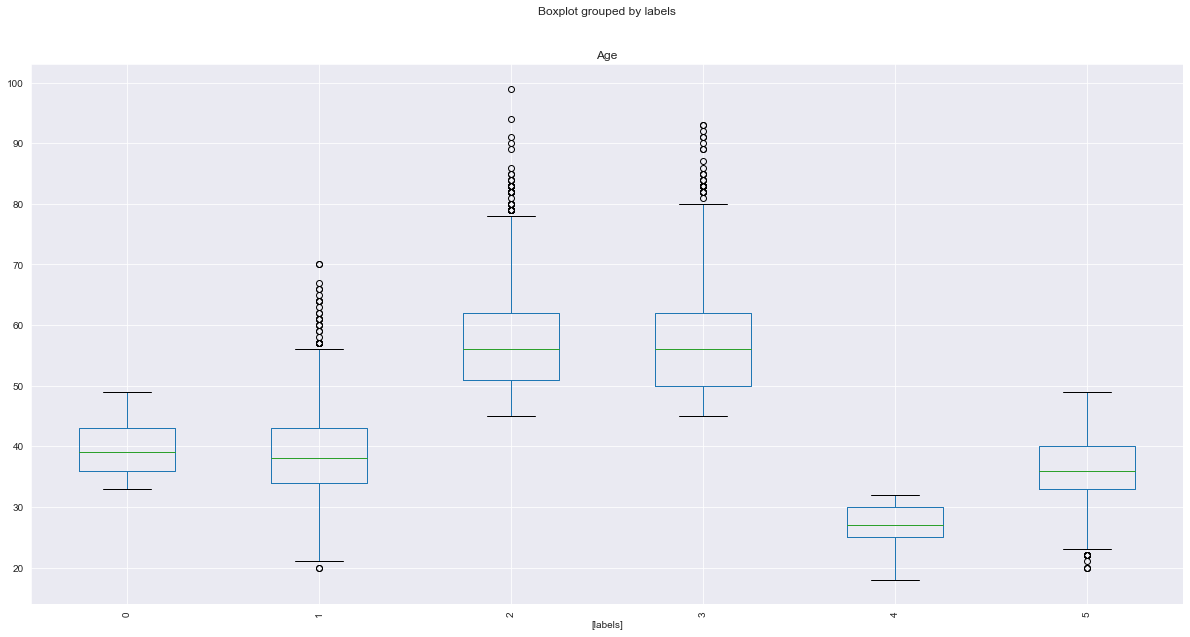

In [107]:
age_labels = scores_data[['Age', 'labels']]
age_labels.boxplot(by='labels', figsize = (20,10))
plt.xticks(rotation = 90)
plt.show();

Inferred clusters:
- Cluster 0 -> Middle Aged and with fairly positive reviews
- Cluster 1 -> Similarly aged but wit more relatively negative reviews
- Cluster 2 -> Older Aged but with positive sentiments
- Cluster 3 -> Older Aged but with most positive reviews
- Cluster 4 -> Younger age band with positive sentiments
- Cluster 5 -> Relatively younger consumers with very positive sentiments